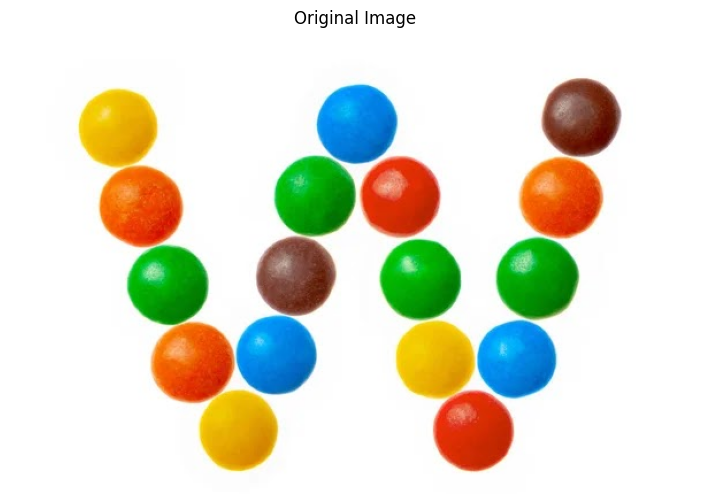

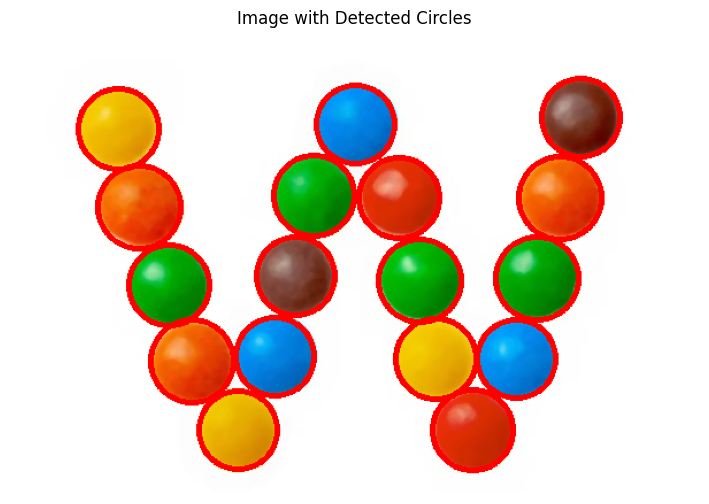

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# อ่านภาพ
img = cv2.imread('smarties.jpg')

# แสดงภาพเดิม (แปลงเป็น RGB เพื่อให้แสดงใน matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# แสดงภาพเดิม
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# ใช้ median blur เพื่อลด noise
img = cv2.medianBlur(img, 5)
img_copy = img.copy()

# แปลงภาพเป็น grayscale
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

# ตรวจจับวงกลม
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 20, param1=60, param2=40, minRadius=5, maxRadius=50)
circles = np.uint16(np.around(circles))

# วาดวงกลมที่ตรวจพบ
for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4)

# แปลงภาพที่มีการวาดวงกลมจาก BGR เป็น RGB
img_rgb_with_circles = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# แสดงภาพที่มีวงกลม
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb_with_circles)
plt.title("Image with Detected Circles")
plt.axis('off')
plt.show()
